Задача взята с https://www.kaggle.com/datasets/nexuswho/laboro-tomato/code

### Загружаем архив с гугл диска и распаковываем его

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/archive.zip'

colab_path = '/content/datasets'

!cp $drive_path $colab_path

!unzip $colab_path/archive.zip -d $colab_path

### Основная часть

In [ ]:
# Create dataset.yaml
data = """
names:
  - b_fully_ripened
  - b_half_ripened
  - b_green
  - l_fully_ripened
  - l_half_ripened
  - l_green
nc: 6
train: train/images
val: val/images
"""

with open('dataset.yaml', 'w') as file:
  file.write(data)


In [ ]:
# setting YOLOv8 custom and training
# ! pip install ultralytics

from ultralytics import YOLO

# Load model
model = YOLO('yolov8x.pt')

# Training
results = model.train(
    data='dataset.yaml',
    imgsz=640,
    epochs=50,
    batch=10
)

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=dataset.yaml, epochs=50, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

In [ ]:
import shutil

folders = ['/content/runs']
archive_path = '/content/out_Yolo'

shutil.make_archive(archive_path, 'zip', *folders)

'/content/out_Yolo.zip'

In [ ]:
from ultralytics import YOLO
import PIL

# Load a model
custom = YOLO('/content/runs/detect/train2/weights/best.pt')

# Predict with the model
result = custom(save=True, conf=0.5, source="/content/datasets/val/images/IMG_0986.jpg")


image 1/1 /content/datasets/val/images/IMG_0986.jpg: 640x480 3 b_half_ripeneds, 60.9ms
Speed: 4.3ms preprocess, 60.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2


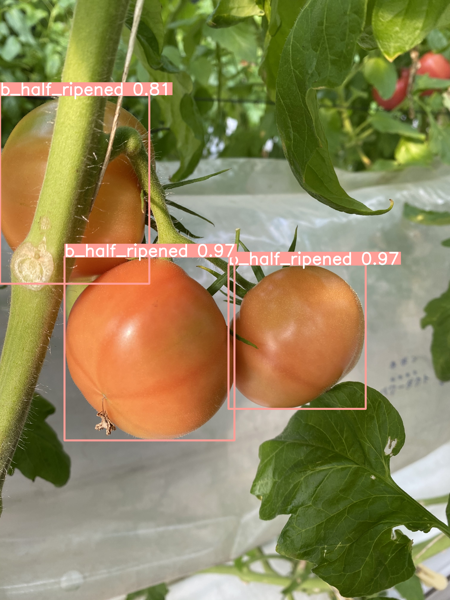

In [ ]:
from PIL import Image
from IPython.display import display

# Open the image
image = Image.open("/content/runs/detect/predict2/IMG_0986.jpg")

# Specify the size you want for the displayed image
desired_size = (700, 600)  # Replace with the desired width and height

# Create a thumbnail with the specified size
image.thumbnail(desired_size)

# Display the image
display(image)

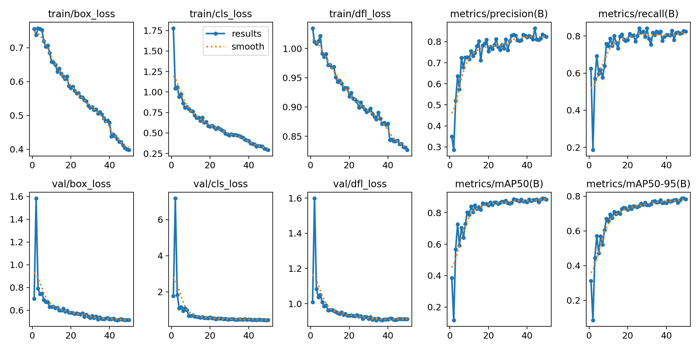

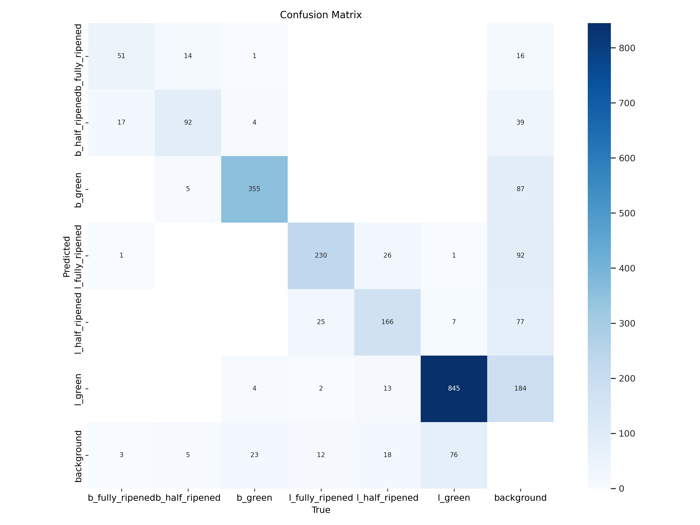

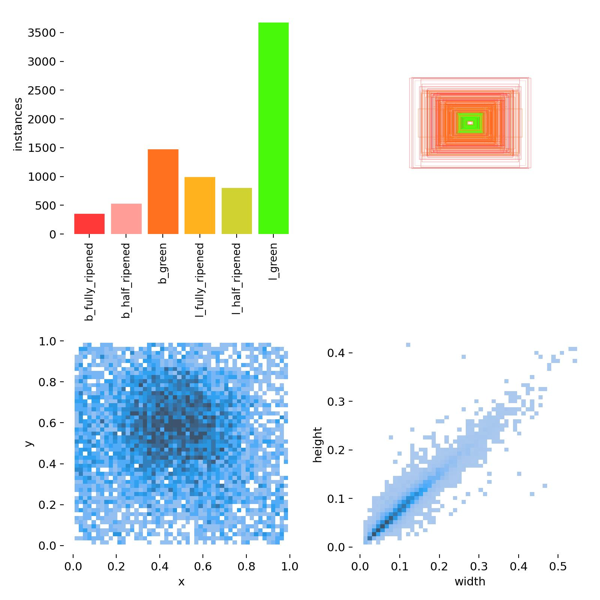

In [ ]:
from PIL import Image
from IPython.display import display

def display_images(image_paths, desired_size=(700, 600)):
    for path in image_paths:
        image = Image.open(path)
        image.thumbnail(desired_size)
        display(image)

# List of image paths
image_paths = ["/content/runs/detect/train2/results.png",
               "/content/runs/detect/train2/confusion_matrix.png",
               "/content/runs/detect/train2/labels.jpg"]

# Display all images with the specified size
display_images(image_paths)